# US Store Sales Analysis

##### Importing necessary libraries

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("sales.csv")
df.head()

,Area_code,State,Profit,Margin,Sales,COGS,Total_expenses,Marketing,Inventory,Date,Product_Type
0,203,Connecticut,107,176,292,116,69,38,962,04-01-2010,Coffee
1,203,Connecticut,75,135,225,90,60,29,1148,07-01-2010,Coffee
2,203,Connecticut,122,195,325,130,73,42,1134,11-01-2010,Coffee
3,203,Connecticut,105,174,289,115,69,37,1166,12-01-2010,Coffee
4,203,Connecticut,104,135,223,90,56,29,1148,07-01-2011,Coffee


##### Adding Necessary Columns

In [75]:
# adding month and year columns
date_col = pd.DatetimeIndex(df['Date'])
df['Month'] = date_col.month
df['Year'] = date_col.year
df

,Area_code,State,Profit,Margin,Sales,COGS,Total_expenses,Marketing,Inventory,Date,Product_Type,Month,Year
0,203,Connecticut,107,176,292,116,69,38,962,04-01-2010,Coffee,4,2010
1,203,Connecticut,75,135,225,90,60,29,1148,07-01-2010,Coffee,7,2010
2,203,Connecticut,122,195,325,130,73,42,1134,11-01-2010,Coffee,11,2010
3,203,Connecticut,105,174,289,115,69,37,1166,12-01-2010,Coffee,12,2010
4,203,Connecticut,104,135,223,90,56,29,1148,07-01-2011,Coffee,7,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,985,Louisiana,-6,66,113,47,72,42,-395,07-01-2010,Espresso,7,2010
4244,985,Louisiana,-7,61,105,44,68,39,-508,08-01-2010,Espresso,8,2010
4245,985,Louisiana,-3,76,131,55,79,49,-1053,12-01-2010,Espresso,12,2010
4246,985,Louisiana,1,87,160,63,86,57,37,04-01-2011,Espresso,4,2011


#### Which Product has highest sales

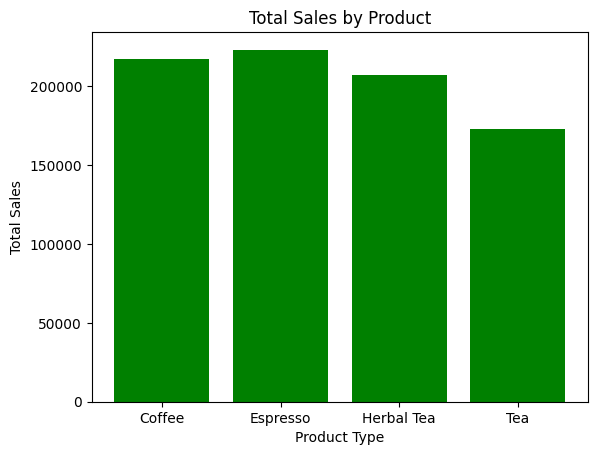

In [84]:
results = df.groupby("Product_Type")['Sales'].sum()
products = results.index

plt.bar(products, results, color = 'green')
plt.xticks(products)
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()

#### Sales by month

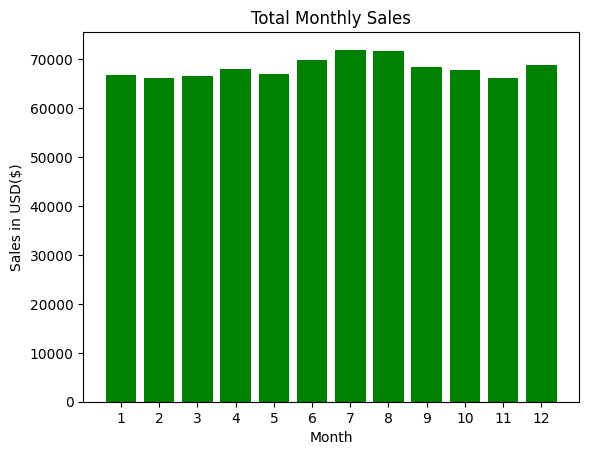

In [76]:
results = df.groupby('Month').sum()['Sales']
months = results.index

plt.bar(months, results.values, color = "green")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales in USD($)")
plt.title("Total Monthly Sales")
plt.show()

#### Sales by States

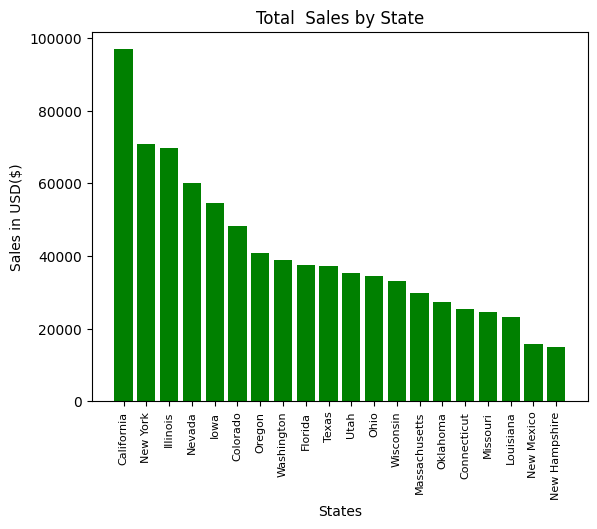

In [77]:
results = df.groupby('State').sum()['Sales'].sort_values(ascending=False)
states = results.index

plt.bar(states, results, color = "green")
plt.xticks(states, rotation = 'vertical', size ='8')
plt.xlabel("States")
plt.ylabel("Sales in USD($)")
plt.title("Total  Sales by State")
plt.show()

#### Profit % by states

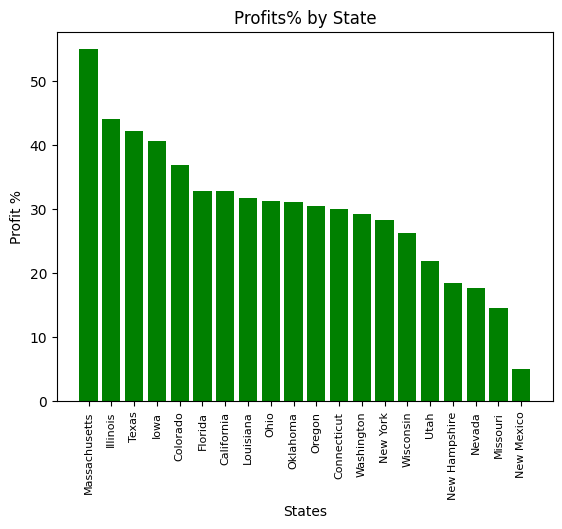

In [78]:
sales_per_state = df.groupby('State').sum()['Sales']
profit_per_state = df.groupby('State').sum()['Profit']
profit_percentage = (profit_per_state/sales_per_state*100).sort_values(ascending=False)
states = profit_percentage.index
# profit_percentage
plt.bar(states, profit_percentage, color = "green")
plt.xticks(states, rotation = 'vertical', size ='8')
plt.xlabel("States")
plt.ylabel("Profit %")
plt.title("Profits% by State")
plt.show()

#### Sales to advertisement ratio

###### Calculating Sales to advertisement ratio to find which state is advertising most efficiently

Text(0.5, 1.0, 'Sales to advertisement')

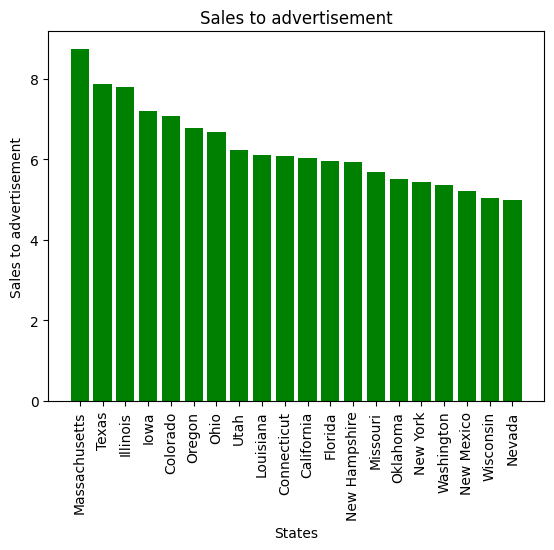

In [79]:
# calculating sales to advertisement ratio per state
sales_per_state = df.groupby('State')['Sales'].sum()
marketing_exp_per_state = df.groupby('State')['Marketing'].sum()
sales_to_ad = (sales_per_state/marketing_exp_per_state).sort_values(ascending=False)

plt.bar(sales_to_ad.index, sales_to_ad, color = 'green')
plt.xticks(sales_to_ad.index, rotation = 'vertical')
plt.xlabel('States')
plt.ylabel('Sales to advertisement')
plt.title('Sales to advertisement')


#### State average COGS(cost of goods sold) vs average profit

C:\Users\ishit\AppData\Local\Temp\ipykernel_15704\1623032333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(states, rotation = 'vertical')


Text(0.5, 1.0, 'Average COGS vs average profit')

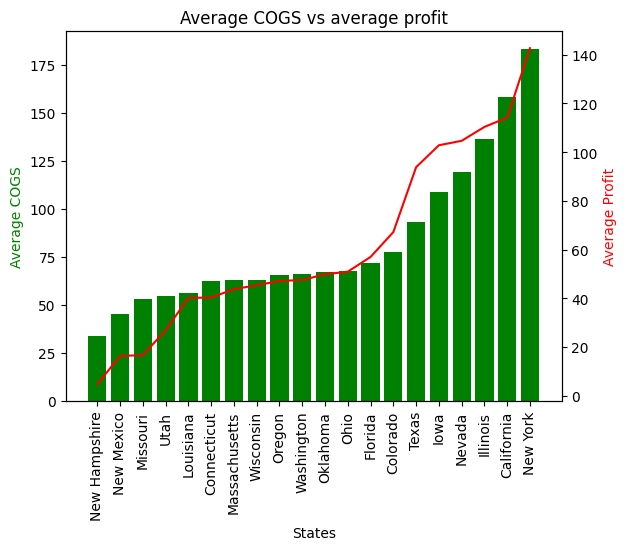

In [103]:
avg_cogs = df.groupby('State')['COGS'].mean().sort_values(ascending=True)
states = avg_cogs.index

avg_profits = df.groupby('State')['Profit'].mean().sort_values(ascending=True)

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(states, avg_cogs, color = 'green')
ax2.plot(states, avg_profits, color='red')

# plt.bar(states, avg_cogs, color = 'green')
ax1.set_xticklabels(states, rotation = 'vertical')
ax1.set_xlabel( "States")
ax1.set_ylabel("Average COGS", color = 'green')
ax2.set_ylabel("Average Profit", color = 'red')
plt.title("Average COGS vs average profit")

#### Areas with least inventory available

In [80]:
inventory = df.groupby('Area_code')['Inventory'].sum().sort_values(ascending=True).head(10)
inventory

Area_code
351   -2136
857   -2119
361     794
817    1089
512    1234
903    1458
806    1618
682    2077
832    2352
830    2418
Name: Inventory, dtype: int64